# **Business Case: Aerofit**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from scipy.special import comb
from scipy.stats import norm,binom,poisson, expon

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 11.0MB/s]


In [ ]:
df=pd.read_csv('aerofit_treadmill.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
## Checking for the Datatypes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
## Types of Products.
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64



*   Aerofit provides 3 types of  Treadmills.
*   KP281 treadmill have more sell as it is entry-level treadmill.
*   Customers from age between 18-50 are the most frequent users.
*   Most of the customers having 15-16 years of Education.
*   Treadmill is used 3-4 times in week.
*   Average income of customers is 50k.
*   95 miles the customer expects to walk/run each week.










In [ ]:
## Lets Check For Null Values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# It seem's that the data consists no null values

In [ ]:
## Length Of Data
len(df)

180

In [ ]:
df[['Gender','Product']].value_counts()

Gender  Product
Female  KP281      40
Male    KP281      40
        KP781      33
        KP481      31
Female  KP481      29
        KP781       7
dtype: int64

#2.Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

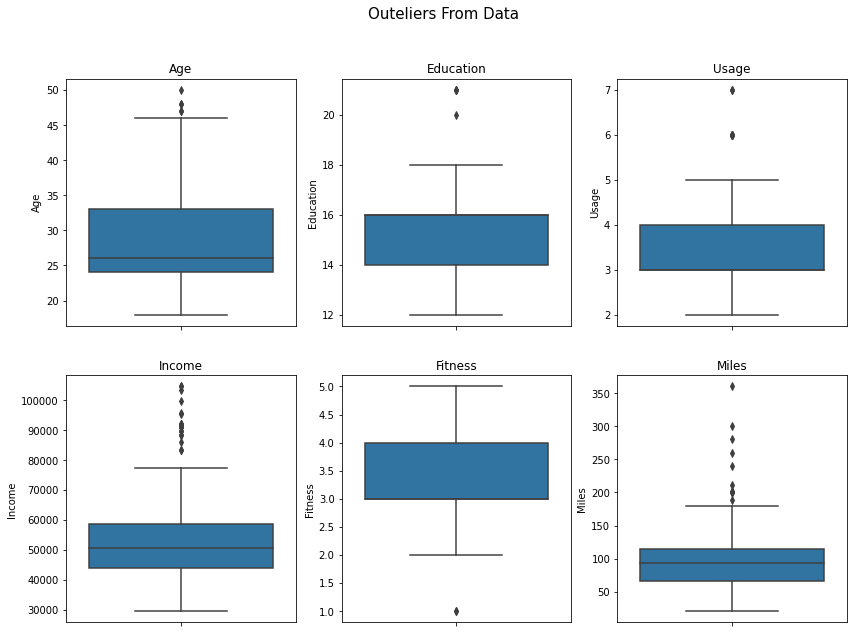

In [ ]:
plt.figure(figsize=(14,10)).suptitle("Outeliers From Data",fontsize=15)
# Using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.boxplot(data=df,y='Age')
plt.title('Age', fontsize=12)

plt.subplot(2, 3, 2)
sns.boxplot(data=df,y='Education')
plt.title('Education', fontsize=12)

plt.subplot(2, 3, 3)
sns.boxplot(data=df,y='Usage')
plt.title('Usage', fontsize=12)

plt.subplot(2,3,4)
sns.boxplot(data=df,y='Income')
plt.title('Income', fontsize=12)

plt.subplot(2,3,5)
sns.boxplot(data=df,y='Fitness')
plt.title('Fitness', fontsize=12)

plt.subplot(2, 3, 6)
sns.boxplot(data=df,y='Miles')
plt.title('Miles', fontsize=12)

plt.show()



*   From above, it seems that Age,Education, Usage and Fitness have very fewer outliers.
*   Income and Miles have more numbers of outliers.



#3.Check if features like marital status, age have any effect on the product purchased.

##Product Vs Marital Status

<AxesSubplot:xlabel='Product', ylabel='count'>

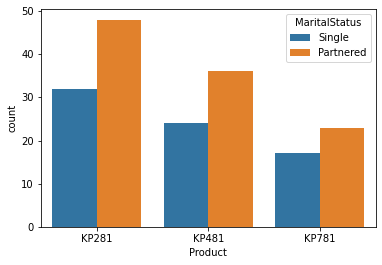

In [ ]:
sns.countplot(data=df,x='Product',hue='MaritalStatus')

*   Couples are purchases all 3 types of products than singles.
*   KP281 entry-level treadmill most commonly used in both singles and Couples.
*   KP781 advanced treadmill is equaly prefered by singles and couples.




#Product Vs Age

*   Customers have ages from 18 to 50 , we need to devide them into categories.
*   We have cteated 3 age groups 18-30 ,30-40 and 40-50.  



In [ ]:
bins = [18,30,40,50]
df['binned'] = pd.cut(df['Age'], bins)

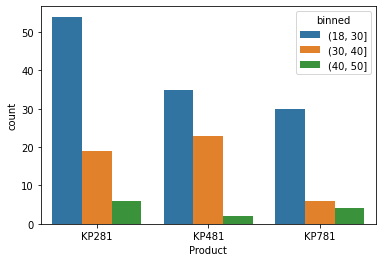

In [ ]:
sns.countplot(data=df,x='Product',hue='binned')
plt.show()



*   Customers of age between 18-30 purchases all 3 types of products.
*   Customers of age between 40-50 having less purchase of all products.
*   Customers of mid age i.e. from age 30-40 prefered KP481 treadmill(mid-level) and having moderate purchase of all products.






# 4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table.

In [ ]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

## KP281 ---> Entry Level

In [ ]:
len(df['Product'])

180

In [ ]:
len(df[df['Product']=='KP281'])

80

In [ ]:
len(df[df['Product']=='KP281']) / len(df['Product'])

0.4444444444444444

## Probability that customer purchases KP281 is 45%.

##KP481 ---> Mid Level

In [ ]:
len(df[df['Product']=='KP481'])

60

In [ ]:
len(df[df['Product']=='KP481']) / len(df['Product'])

0.3333333333333333

## Probability that customer purchases KP481 is 33%.

# KP781 ---> Advanced Level

In [ ]:
len(df[df['Product']=='KP781'])

40

In [ ]:
len(df[df['Product']=='KP781']) / len(df['Product'])

0.2222222222222222

##Probability that customer purchases KP481 is 22%.

# 5. Check correlation among different factors using heat maps or pair plots.

In [ ]:
## Lets check ralation between different factors
## We can simply use .corr() function to get relationship between different factors.
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

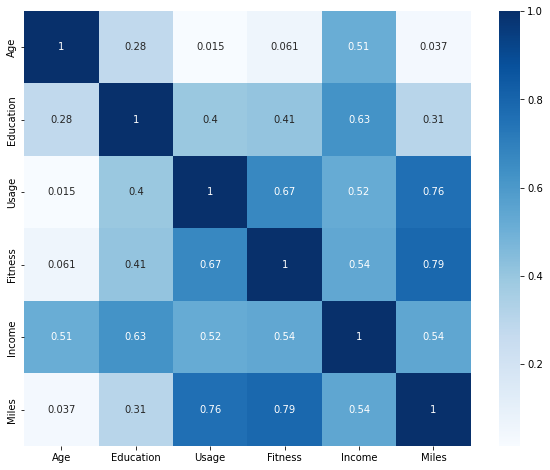

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

## Also we can find out the correlation by using Pair-Plot

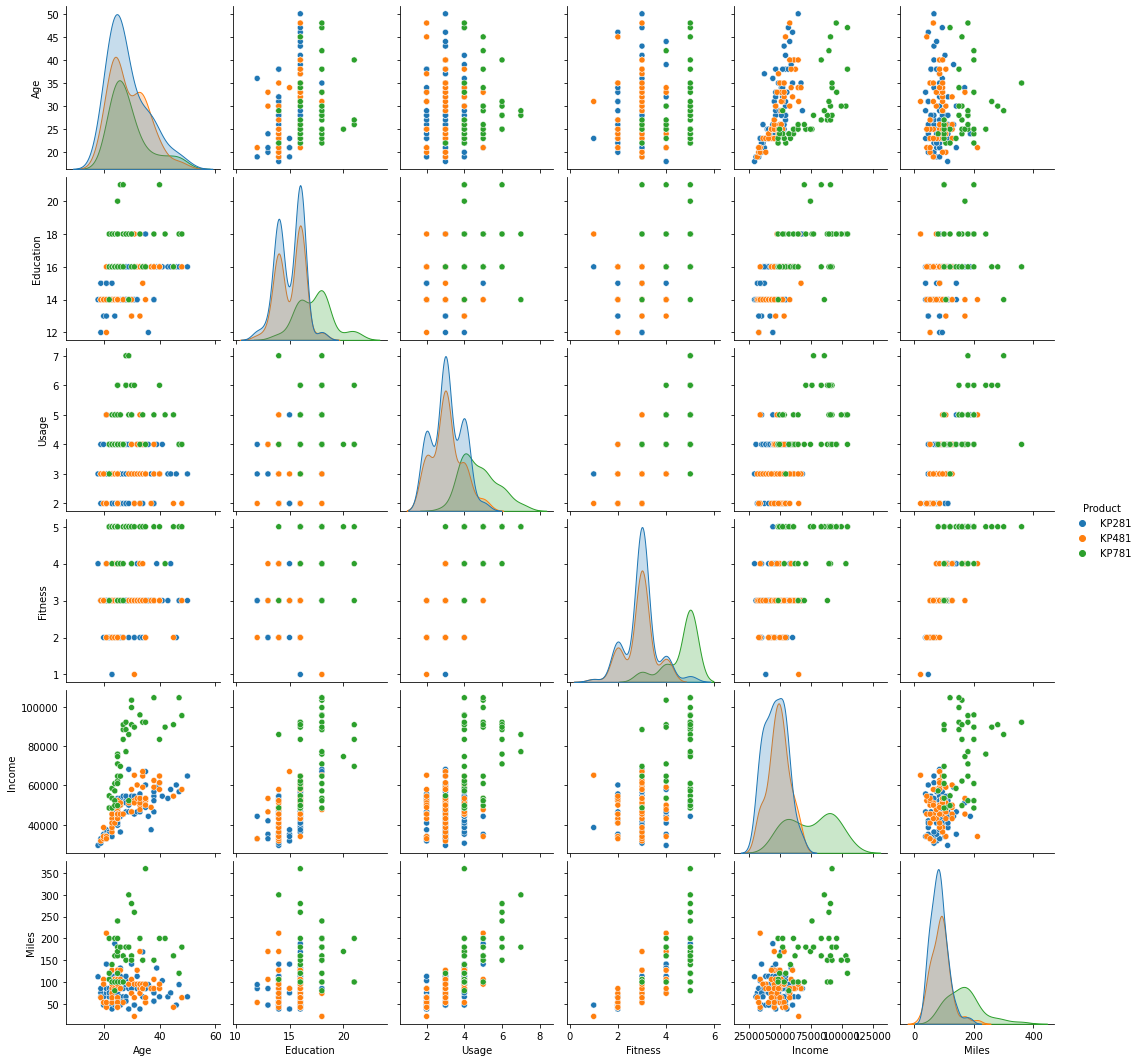

In [ ]:
sns.pairplot(data=df,hue="Product")

#  Q.6 With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?


## To find out probability of male customers buying  KP781 , we have to find out number of males.

In [ ]:
m=df[df['Gender']=='Male']  ## Let m be the dataset having male customers

In [ ]:
len(m)         ## Total Numbers of Males

104

In [ ]:
len(m[m['Product']=='KP781'])  ## Males

33

In [ ]:
len(m[m['Product']=='KP781']) / len(m)

0.3173076923076923

## 31.73 % of male customers buying the advanced treadmill KP781.

# Q.7 Customer Profiling - Categorization of users.


*   For customer profilling we must know that,
1.   Who is our Ideal Customer?
2.   Who needs our products or services?

Lets, categeroised the data on basis of customers education,age and income.

Education

          ---> 0-7 years AS 'Educated'
          ---> 7-14 years As 'Mid Educated'
          ---> 14-21 years As 'Highly Educated'

Age      

          ---> 17-30 As 'Young'
          ---> 30-40 As 'Adults'
          ---> 40-50 As 'Mid-Old'

Income    

          ---> 25k-50k As 'Low Income'
          ---> 50k-75k As 'Mid Income'          
          ---> 75k-105k As 'High Income'




In [ ]:
# Customer Profiling on basis of Education
Cust_Prof=pd.DataFrame()
Cust_Prof['Product']=df['Product']
x=[10,14,18,22]
Cust_Prof['Education_Levels']=pd.cut(df['Education'],x,labels=['Educated','Mid Edu.','High Edu.'])

In [ ]:
## Grouping customers age data
bin=[17,30,40,50]
Cust_Prof['Age_Groups']=pd.cut(df['Age'],bin,labels=['Young','Adults','Mid-Olds'])

In [ ]:
## Grouping Customer Data on basis of their Incomes
bins=[25000,50000,75000,105000]
Cust_Prof['Income_Groups']=pd.cut(df['Income'],bins,labels=['Low_Income','Mid_Income','High_Income'])

In [ ]:
Cust_Prof.head()

,Product,Education_Levels,Age_Groups,Income_Groups
0,KP281,Educated,Young,Low_Income
1,KP281,Mid Edu.,Young,Low_Income
2,KP281,Educated,Young,Low_Income
3,KP281,Educated,Young,Low_Income
4,KP281,Educated,Young,Low_Income


## customer profiling on basis education details.

<AxesSubplot:xlabel='Product', ylabel='count'>

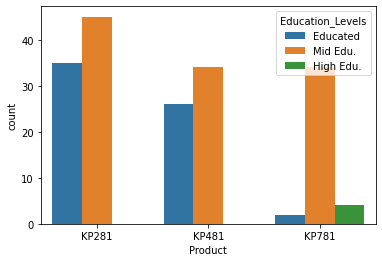

In [ ]:
sns.countplot(data=Cust_Prof,x='Product',hue='Education_Levels')


*   Customers have 14-18 years of education purchases all products.
*   Highly Educated customers uses only KP781 product.



# customer profiling on basis of ages

<AxesSubplot:xlabel='Product', ylabel='count'>

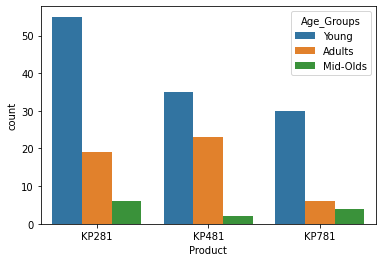

In [ ]:
sns.countplot(data=Cust_Prof,x='Product',hue='Age_Groups')



*   All youngers between 18-30 age purchases all types of products.
*   Adults between age 30-40 purchases KP481 treadmill.
*   Mid-Old customers having very less purchases.



# customer profiling on basis of incomes

<AxesSubplot:xlabel='Product', ylabel='count'>

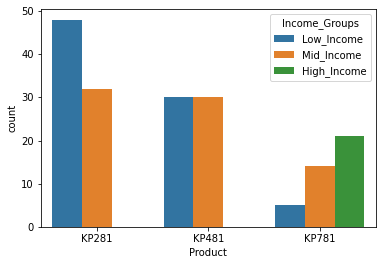

In [ ]:
sns.countplot(data=Cust_Prof,x='Product',hue='Income_Groups')



*   Customers with low income preferd KP281 than KP481.
*   Mid income customers are prefered to buy both entry level and mid level treadmills.
*   Customers having High Income mostly uses advanced level of treadmill.





# Q.8 Probability- marginal, conditional probability

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,binned
0,KP281,18,Male,14,Single,3,4,29562,112,NaN
1,KP281,19,Male,15,Single,2,3,31836,75,"(18.0, 30.0]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(18.0, 30.0]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(18.0, 30.0]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(18.0, 30.0]"


###Probability of purchasing diff products given that singles/partnered

In [ ]:
## 1. Probability of buying KP281 given that maritalstatus is single
len(df[(df['Product']=='KP281') & (df['MaritalStatus']=='Single')])  /   len(df[df['MaritalStatus']=='Single'])

0.4383561643835616

In [ ]:
## 2. Probability of buying KP281 given that maritalstatus is partnered
len(df[(df['Product']=='KP281') & (df['MaritalStatus']=='Partnered')])  /   len(df[df['MaritalStatus']=='Partnered'])

0.4485981308411215

In [ ]:
## 3. Probability of buying KP481 given that maritalstatus is single
len(df[(df['Product']=='KP481') & (df['MaritalStatus']=='Single')])  /   len(df[df['MaritalStatus']=='Single'])

0.3287671232876712

In [ ]:
## 4. Probability of buying KP781 given that maritalstatus is partnered
len(df[(df['Product']=='KP781') & (df['MaritalStatus']=='Partnered')])  /   len(df[df['MaritalStatus']=='Partnered'])

0.21495327102803738

###Probability of purchasing diff products given that fitness score is __ ?

In [ ]:
## 1. Probability of buying KP281 given that fitness score is 4
len(df[(df['Product']=='KP281') & (df['Fitness']==4)])  /   len(df[df['Fitness']==4])

0.375

In [ ]:
## 2. Probability of buying KP781 given that fitness score is 5
len(df[(df['Product']=='KP781') & (df['Fitness']==3)])  /   len(df[df['Fitness']==3])

0.041237113402061855

### Probability that customers got fitness score 5 given that customer purchases KP281



In [ ]:
len(df[(df['Fitness']==5) & (df['Product']=='KP281')])  /   len(df[df['Product']=='KP281'])

0.025



---



# Insights


1. Aerofit provides 3 types of Treadmills.

2. KP281 treadmill have more sell as it is entry-level treadmill.

3. Customers from age between 18-50 are the most frequent users.

4. Most of the customers having 15-16 years of Education.

5. Treadmill is used 3-4 times in week.

6. Average income of customers is 50k.

7. On average 95 miles distance customer expects to walk/run each week

8. Customers of age between 40-50 having less purchase of all products.

9. KP281 entry-level treadmill most commonly used in both singles and Couples.

10. Customers having High Income mostly uses advanced level of treadmill.

# Recommendations



1.   Need to focus on targeting customers having 14-18 years of education and middle income range.

2.   Couples are purchases all 3 types of products than singles. So we have to target the partnered customers.

3.   We have to target Young ,Mid-Educated and customers having less income to increase sale.

4.   We have to focus on customers having fitness rating less than 3.

5.   We need to maintain inventory for KP281 as it is entry level and fast selling product.


